## Develop Hough Transform

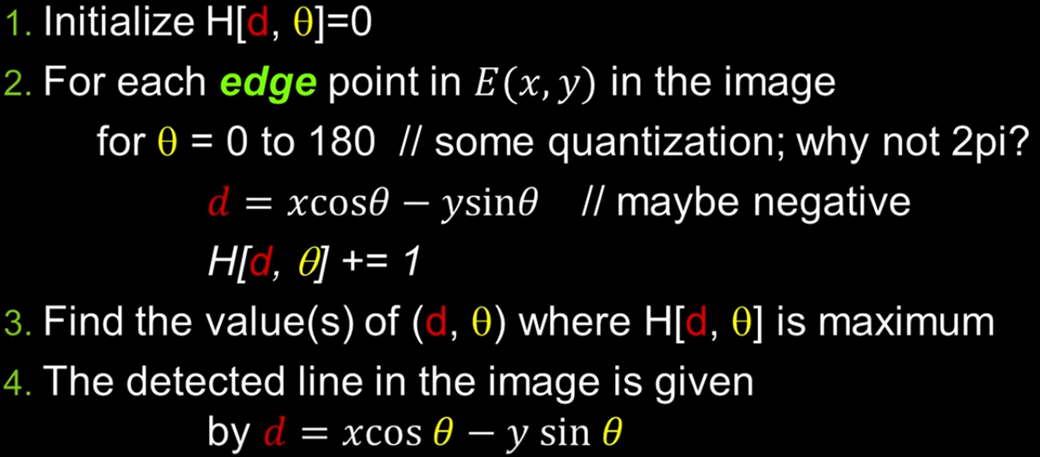

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('tower.jpg')
edges = cv2.Canny(img,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)

for x in range(0, 10):
    for rho,theta in lines[x]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
       
    


cv2.imshow('hough',img)
cv2.waitKey(0)

-1

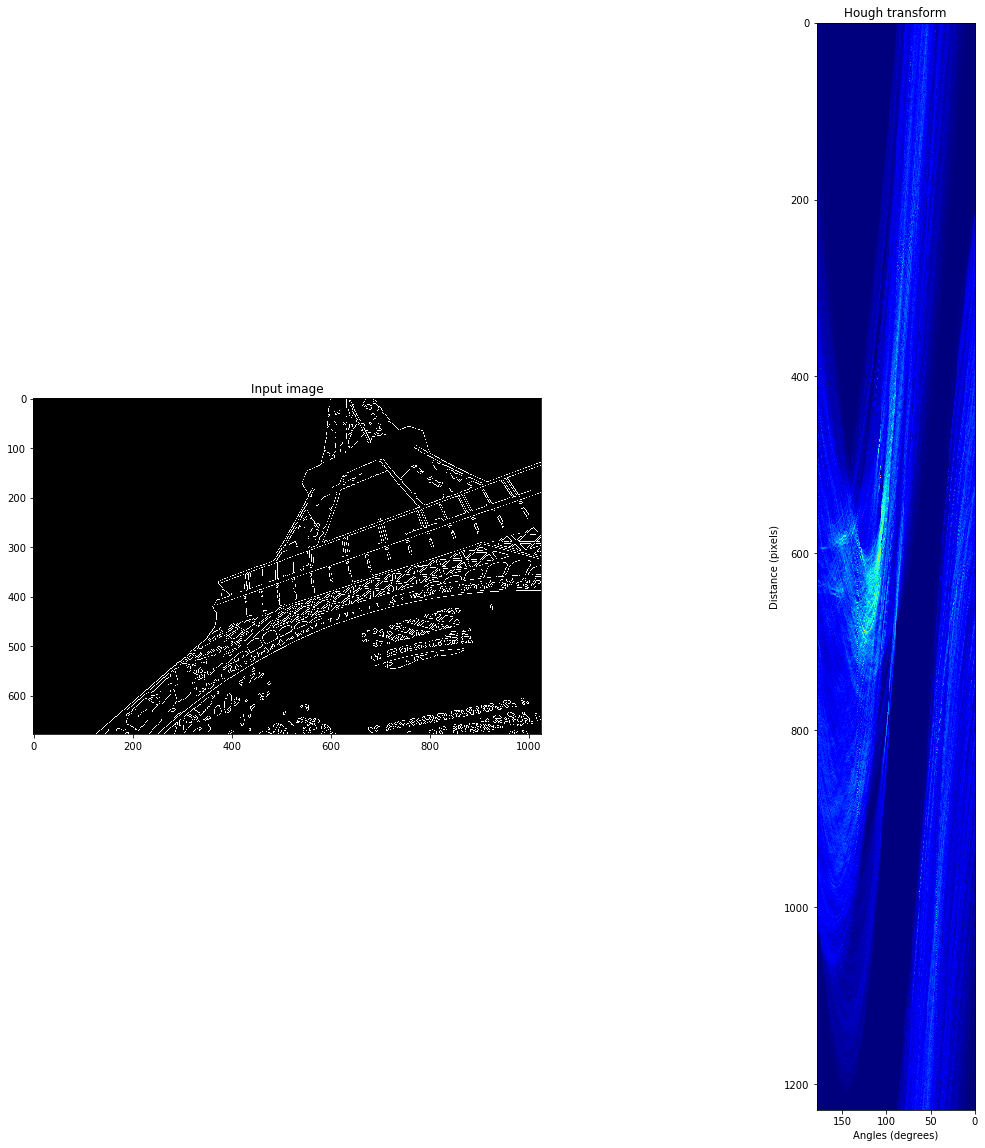

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('tower.jpg')
shapes_blurred = cv2.GaussianBlur(img, (5, 5), 1.5)
canny_edges = cv2.Canny(shapes_blurred, 200, 400)
cv2.imshow('hough',canny_edges)
cv2.waitKey(0)

def hough_lines_acc(img, rho_r=1, theta_r=1):
    height, width = img.shape
    img_diagonal = np.ceil(np.sqrt(height*height + width*width))
    rhos = np.arange(0, img_diagonal + 1, rho_r)
    thetas = np.deg2rad(np.arange(0, 180, theta_r))
    H = np.zeros((len(rhos), len(thetas)), dtype=np.uint64)
    y_, x_ = np.nonzero(img) 
    
    for i in range(len(x_)): 
        x = x_[i]
        y = y_[i]

        for j in range(len(thetas)): # cycle through thetas and calc rho
            rho = int((x * np.cos(thetas[j]) +
                       y * np.sin(thetas[j])))
            H[rho, j] += 1
    return H,rhos,thetas
def show_hough_line(img, accumulator):
    fig,ax = plt.subplots(1, 2, figsize=(20, 20))

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].axis('image')

    ax[1].imshow(
    accumulator, cmap='jet',
    extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
    ax[1].set_aspect('equal', adjustable='box')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')

  #plt.axis('off') 
    plt.savefig('building.jpg', bbox_inches='tight')
    plt.show()
H,rhos,thetas = hough_lines_acc(canny_edges)
show_hough_line(canny_edges,H)